# Example 5: Estimating meta-d (metacognitive efficiency)

In this example, we will use a small dataset to demonstrate how to estimate metacognitive efficiency with the `cpm` toolbox. The experimental design consists of a percepetual decision-making task, followed by a confidence rating. On each trial, participants are presented with a stimulus and asked to make a binary decision. After making their decision, they are asked to rate their confidence in that decision on a scale from 1 to 100. The general experimental design is based on Moses-Payne et al. (2017). Let's have a look at the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cpm.applications.signal_detection as sdt

In [2]:
data = pd.read_csv("metacognition_small.csv")
data["observed"] = data["confidence"]
data = data[data.subject.isin(data.subject.unique()[0:10])]
data.columns = ["subject", "signal", "response", "confidence", "intensities", "ppt", "observed"]
data["accuracy"] = data["response"] == data["signal"]
data.accuracy = data.accuracy.astype(int)

In [3]:
data.head()

,subject,signal,response,confidence,intensities,ppt,observed,accuracy
0,89aa1e580023722db67646e8149eb246c748e180e34a1c...,1.0,0.0,0.89,2.0,0,0.89,0
1,89aa1e580023722db67646e8149eb246c748e180e34a1c...,1.0,1.0,1.00,6.0,0,1.00,1
2,89aa1e580023722db67646e8149eb246c748e180e34a1c...,0.0,0.0,0.44,6.0,0,0.44,1
3,89aa1e580023722db67646e8149eb246c748e180e34a1c...,0.0,0.0,0.52,2.0,0,0.52,1
4,89aa1e580023722db67646e8149eb246c748e180e34a1c...,1.0,0.0,0.46,2.0,0,0.46,0


## Fitting the model

In what follows, we will estimate metacognitive efficiency, meta-d (Maniscalco & Lau, 2012), a measure of the quality fo confidence judgements based on Signal Detection Theory. The toolbox `cpm` provides a convenient built-in estimator, that we can use to estimate meta-d from the data:

In [5]:

## suppress warnings
import warnings
warnings.filterwarnings("ignore")

optim = sdt.EstimatorMetaD(
    data=data.groupby("subject"),
    bins=4,
    cl=None,
    parallel=False,
    libraries=["numpy", "pandas"],
    prior=True,
    display=False,
    ppt_identifier=None,
)

optim.optimise()

Correcting for bias in high confidence ratings
Correcting for bias in high confidence ratings
Correcting for bias in high confidence ratings


The model has now been fitted to the data. We can see that there were three participants in the experiment, where we had to adjust the binning procedure of the  confidence ratings, but the fitting procedure was succesful. Let us now extract the estimates of meta-d for each participant.

In [6]:
optim.export()

,d_0,meta_d_0,m_diff_0,m_ratio_0,s_0,meta_c_0,t2c1_rS1_0,t2c1_rS1_1,t2c1_rS1_2,t2c1_rS2_0,...,hess_40,hess_41,hess_42,hess_43,hess_44,hess_45,hess_46,hess_47,hess_48,ppt_0
0,0.928462,0.175854,-0.752609,0.189403,1,0.022989,-0.710823,-0.460018,0.008069,0.040525,...,173.133248,-97.910152,-3.815409,0.000000e+00,0.000000,0.000007,0.000002,-97.910152,116.046561,3949ac1596ec77106a709a618bf5adcb19b77537ce8bcb...
1,1.154583,0.711754,-0.442829,0.616460,1,-0.105148,-0.164566,-0.145272,-0.125361,-0.087290,...,2206.835358,-583.581053,-7.385582,2.357374e-06,0.000000,0.000002,0.000002,-583.581053,611.344657,3de8392541ace28284aca7f2724273739fcf4cf73de276...
2,1.365237,1.422438,0.057201,1.041898,1,-0.401081,-1.210384,-0.895104,-0.638972,0.224949,...,65.258773,-11.236949,-6.209379,-2.864375e-06,-0.000004,0.000000,0.000004,-11.236949,20.713353,5e74cb2ad4e2c9e2d3f59a1e6c8a5d4999df48e5dd6987...
3,1.227024,0.233054,-0.993970,0.189934,1,0.006100,-1.297977,-0.755082,-0.344195,0.333404,...,281.156064,-93.505147,-6.994933,2.273737e-05,0.000015,0.000015,0.000015,-93.505147,121.158590,621cb5d0bdea9584dc9f7ede1479e7cca67f8d9778d7e3...
4,0.923535,0.891144,-0.032391,0.964927,1,-0.143318,-1.278178,-0.753387,-0.398681,0.322146,...,149.700580,-39.341105,-7.351680,-5.728751e-06,-0.000013,-0.000015,-0.000013,-39.341105,56.679524,89aa1e580023722db67646e8149eb246c748e180e34a1c...
5,0.995106,0.690257,-0.304849,0.693652,1,-0.003364,-1.125754,-0.707026,-0.430022,0.289896,...,99.742226,-41.884556,-3.273296,-5.728751e-06,-0.000006,-0.000006,-0.000006,-41.884556,54.316067,a3aaf5a0e9ad2901ab35ce73910be7fbbe1731a3ed1ff9...
6,1.252840,0.724308,-0.528532,0.578133,1,0.311537,-1.154250,-0.511934,-0.177051,0.380323,...,238.145748,-128.419758,-0.532772,9.251859e-07,0.000004,0.000000,0.000000,-128.419758,143.562197,c7ce483fd1cc5fd498e7e2a09851c65f89a33a6837f66d...
7,1.203433,0.343445,-0.859988,0.285387,1,-0.010208,-1.223147,-0.672549,-0.396688,0.297899,...,129.302296,-56.447258,-2.924588,-1.850372e-06,-0.000008,-0.000002,-0.000002,-56.447258,70.567916,d4e33e2934280979f580a63f992daa7d0de2cd64a145d5...
8,0.995201,1.805221,0.810020,1.813926,1,-0.498091,-1.596627,-1.071526,-0.738701,0.179925,...,79.172962,-29.463423,-14.493317,-5.728751e-06,-0.000002,-0.000003,-0.000014,-29.463423,45.269278,fa7aec4efb728534ef32c172197c9560097c6d0e4893fe...
9,1.221030,0.749125,-0.471905,0.613519,1,0.201418,-1.100361,-0.638683,-0.210017,0.575284,...,94.655668,-23.307862,-0.666599,-1.850372e-06,0.000000,0.000000,0.000006,-23.307862,32.279669,fcf1e4bf9cc9c1083647b91463e86f49c6961406c37055...


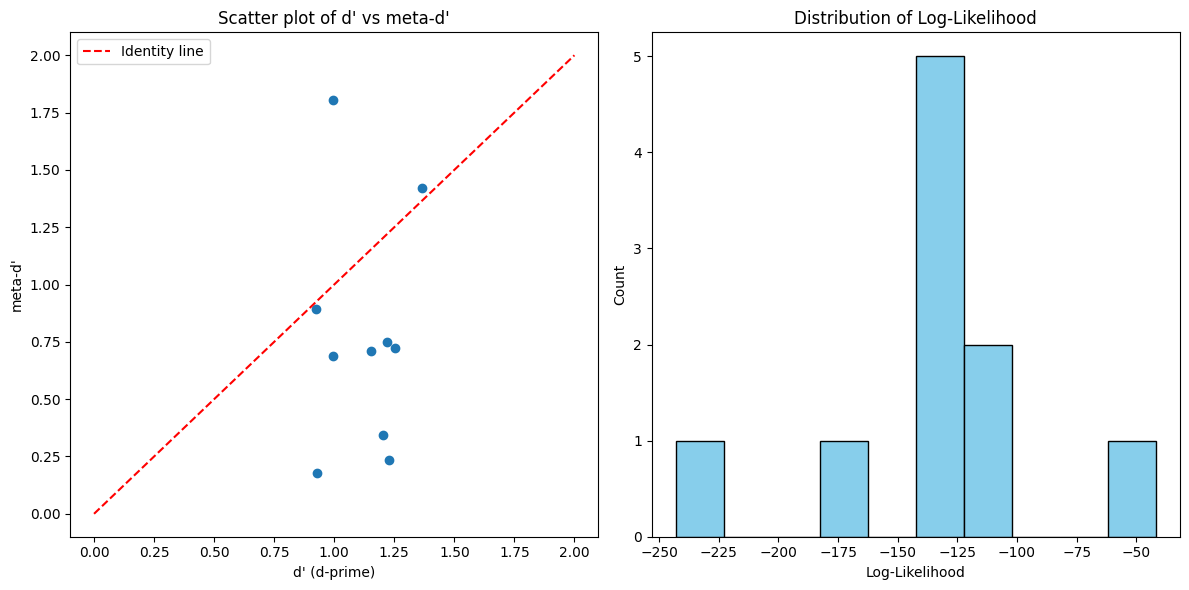

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of d' vs meta-d'
axs[0].scatter(d_0, meta_d_0)
axs[0].set_xlabel("d' (d-prime)")
axs[0].set_ylabel("meta-d'")
axs[0].set_title("Scatter plot of d' vs meta-d'")
axs[0].plot([0, 2], [0, 2], 'r--', label="Identity line")
axs[0].legend()

# Distribution of logL_0
axs[1].hist(results['logL_0'], bins=10, color='skyblue', edgecolor='black')
axs[1].set_xlabel('Log-Likelihood')
axs[1].set_ylabel('Count')
axs[1].set_title('Distribution of Log-Likelihood')

plt.tight_layout()
plt.show()

## References

Maniscalco, B., & Lau, H. (2012). A signal detection theoretic approach for estimating metacognitive sensitivity from confidence ratings. Consciousness and Cognition, 21(1), 422–430. https://doi.org/10.1016/j.concog.2011.09.021

Moses‐Payne, M. E., Habicht, J., Bowler, A., Steinbeis, N., & Hauser, T. U. (2021). I know better! Emerging metacognition allows adolescents to ignore false advice. Developmental Science, 24(5), e13101.

